## Project I - Titanic: Machine Learning from Disaster

### ----- Więcej teorii znajduje się na prezentacji umieszczonej wraz z notatnikiem na GitHub'ie :) -----

### Wczytanie danych:

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('C:/Users/Ada/Desktop/Learning Group/2018_10_30/Titanic/all/train.csv')

In [3]:
test = pd.read_csv('C:/Users/Ada/Desktop/Learning Group/2018_10_30/Titanic/all/test.csv')

In [4]:
final = pd.read_csv('C:/Users/Ada/Desktop/Learning Group/2018_10_30/Titanic/all/gender_submission.csv')

### Trochę teorii...

#### Czemu mamy do dyspozycji 2 zbiory?
#### Zbiór uczący (train set) - służy do oszacowania konkurujących modeli, ich parametrów
#### Zbiór walidacyjny (validation set) - służy do wyboru jednego z oszacowanych klasyfikatorów - tego, który ma najmniejszy błąd na zbiorze walidacyjnym
#### Zbiór testowy (test set) - służy do nieobciążonej oceny błędu

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head(n=4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [7]:
final.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


#### UWAGA! W Python numeracja zaczyna się od 0!

### Zmienne:
#### -- PassengerId - type should be integers
#### -- Survived - Survived or Not
#### -- Pclass - Class of Travel
#### -- Name - Name of Passenger
#### -- Sex- Gender
#### -- Age
#### -- SibSp - Number of Sibling/Spouse aboard
#### -- Parch - Number of Parent/Child aboard
#### -- Ticket
#### -- Fare
#### -- Cabin
#### -- Embarked - The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

### Klasyfikacja zmiennych w zbiorze:
#### Zmienna celu (objaśniana) vs zmienne objaśniające
#### Zmienne ciągłe vs zmienne klasyfikujące (kategoryzujące) (w tym binarne, nominalne, porządkowe)

### Problem klasyfikacyjny vs problem regresyjny

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


### EDA - Exploratory Data Analysis

In [11]:
import seaborn as sns
%matplotlib inline

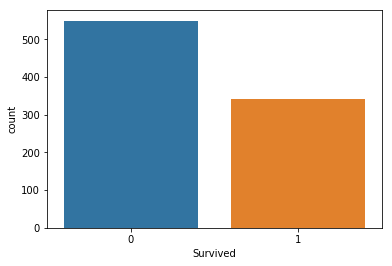

In [12]:
sns.countplot(x='Survived', data=train)

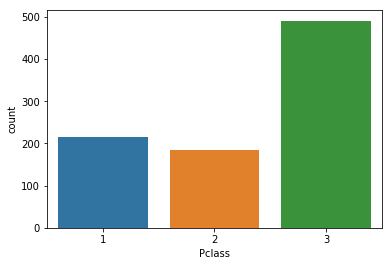

In [13]:
sns.countplot(x='Pclass', data=train)

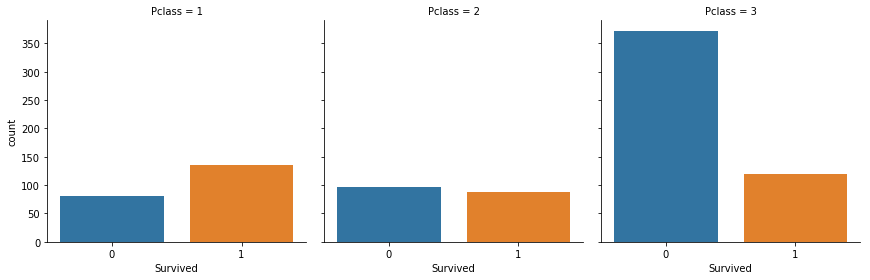

In [14]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=train)

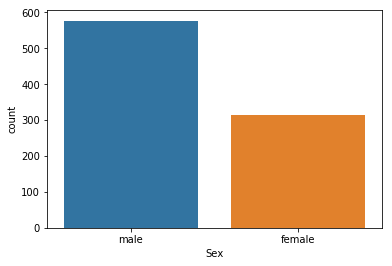

In [15]:
sns.countplot(x='Sex', data=train)

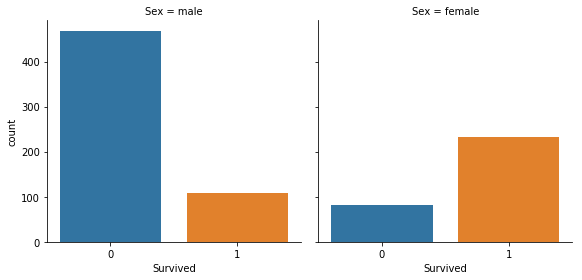

In [16]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=train)

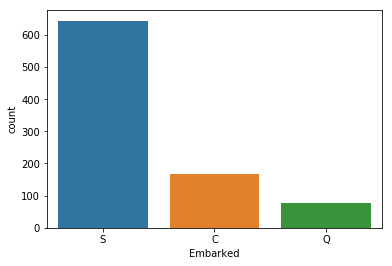

In [17]:
sns.countplot(x='Embarked', data=train)

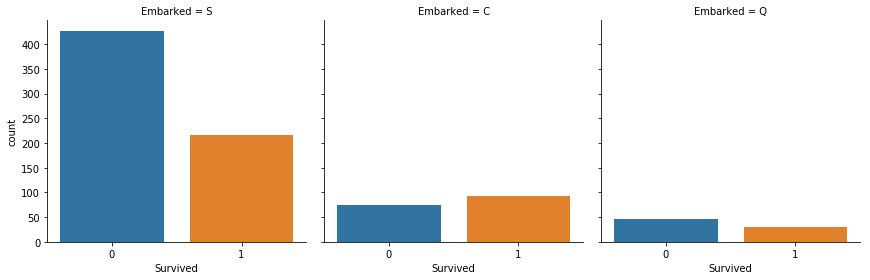

In [18]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=train)

C:\Users\Ada\AppData\Local\conda\conda\envs\mgr\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


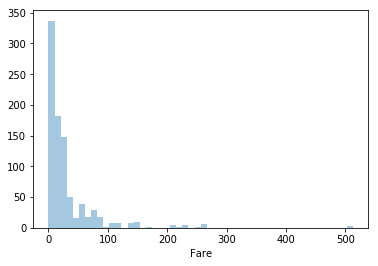

In [19]:
sns.distplot(train.Fare, kde=False)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

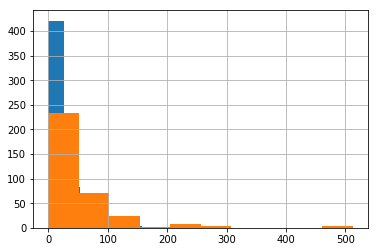

In [20]:
train.groupby('Survived').Fare.hist()

In [21]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


### Przygotowanie danych:

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
train['Age'] = train.Age.fillna(train.Age.median())

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train = pd.get_dummies(train, columns=['Sex'], drop_first=True)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [27]:
train = train[['Survived', 'Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Sex_male    891 non-null uint8
Fare        891 non-null float64
Age         891 non-null float64
Pclass      891 non-null int64
SibSp       891 non-null int64
dtypes: float64(2), int64(3), uint8(1)
memory usage: 35.8 KB


In [29]:
train.head()

,Survived,Sex_male,Fare,Age,Pclass,SibSp
0,0,1,7.2500,22.0,3,1
1,1,0,71.2833,38.0,1,1
2,1,0,7.9250,26.0,3,0
3,1,0,53.1000,35.0,1,1
4,0,1,8.0500,35.0,3,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,1:], train.iloc[:,0], test_size=0.2, random_state=123)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 329 to 510
Data columns (total 5 columns):
Sex_male    712 non-null uint8
Fare        712 non-null float64
Age         712 non-null float64
Pclass      712 non-null int64
SibSp       712 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 28.5 KB


In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 172 to 221
Data columns (total 5 columns):
Sex_male    179 non-null uint8
Fare        179 non-null float64
Age         179 non-null float64
Pclass      179 non-null int64
SibSp       179 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 7.2 KB


### Implementacja drzewa decyzyjnego:

In [34]:
from sklearn import tree

In [35]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [52]:
clf.feature_importances_

array([0.61190888, 0.0385383 , 0.06581677, 0.20708084, 0.07665521])

In [54]:
import graphviz

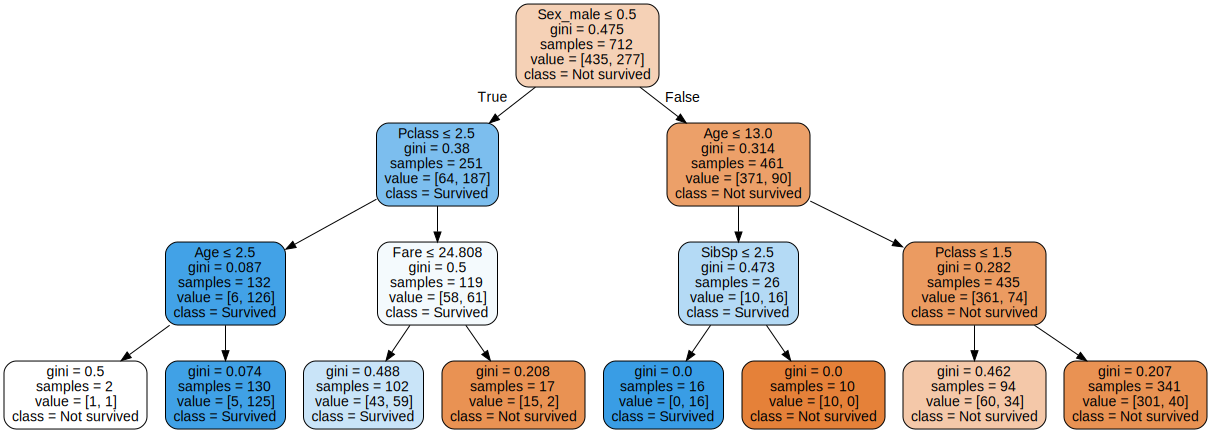

In [60]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                        feature_names=['Sex_male', 'Fare', 'Age','Pclass', 'SibSp'],  
                        class_names=['Not survived', 'Survived'],
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [61]:
clf.score(X_test, y_test)

0.8491620111731844

### Dostrajanie hiperparametrów:

In [63]:
import numpy as np

In [64]:
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

In [65]:
dep

array([1, 2, 3, 4, 5, 6, 7, 8])

In [66]:
train_accuracy

array([1.5926715e-317, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
       6.0967701e-320, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000])

In [67]:
test_accuracy

array([0., 0., 1., 0., 0., 1., 1., 1.])

In [68]:
# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)

In [69]:
import matplotlib.pyplot as plt

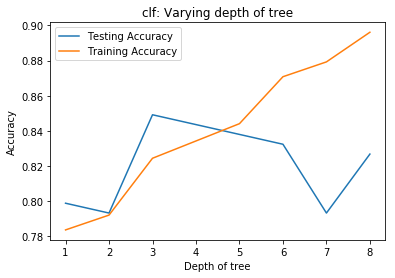

In [70]:
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

### Las losowy:

In [80]:
from sklearn.ensemble import RandomForestClassifier
import random

In [81]:
random.seed(123)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [83]:
clf.feature_importances_

array([0.27487625, 0.30015269, 0.28452532, 0.08625634, 0.0541894 ])

In [84]:
y_pred=clf.predict(X_test)

In [85]:
from sklearn import metrics

In [86]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8379888268156425


### Wyznaczanie ważności zmiennych na podstawie wyników lasu losowego:

In [ ]:
clf.feature_importances_

In [87]:
feature_imp = pd.Series(clf.feature_importances_,index=['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']).sort_values(ascending=False)
feature_imp

Fare        0.300153
Age         0.284525
Sex_male    0.274876
Pclass      0.086256
SibSp       0.054189
dtype: float64

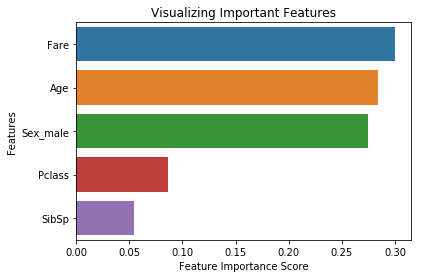

In [89]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Przydatne linki:

https://www.datacamp.com/community/tutorials/kaggle-tutorial-machine-learning

https://www.datacamp.com/community/tutorials/random-forests-classifier-python#building